In [1]:
import sys
print(sys.version)

3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:14:58) [MSC v.1929 64 bit (AMD64)]


In [2]:
import numpy as np
import gymnasium as gym
import tankEnv

env = gym.envs.make('crudeTanksEnv-v0')

C:\ProgramData\Anaconda3\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (2, 10)
  logger.warn(
C:\ProgramData\Anaconda3\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (2, 5)
  logger.warn(
C:\ProgramData\Anaconda3\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vec

In [3]:
state0, data = env.reset()
action = env.action_space.sample()
obs, reward, done, truncated, info = env.step(action)
action, data['actionAvail'][1][action['farmTanks'][1]]

C:\ProgramData\Anaconda3\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(OrderedDict([('farmTanks', array([6, 3], dtype=int64)),
              ('unitFeed', array(0.78788011))]),
 False)

720 472.3958557492284


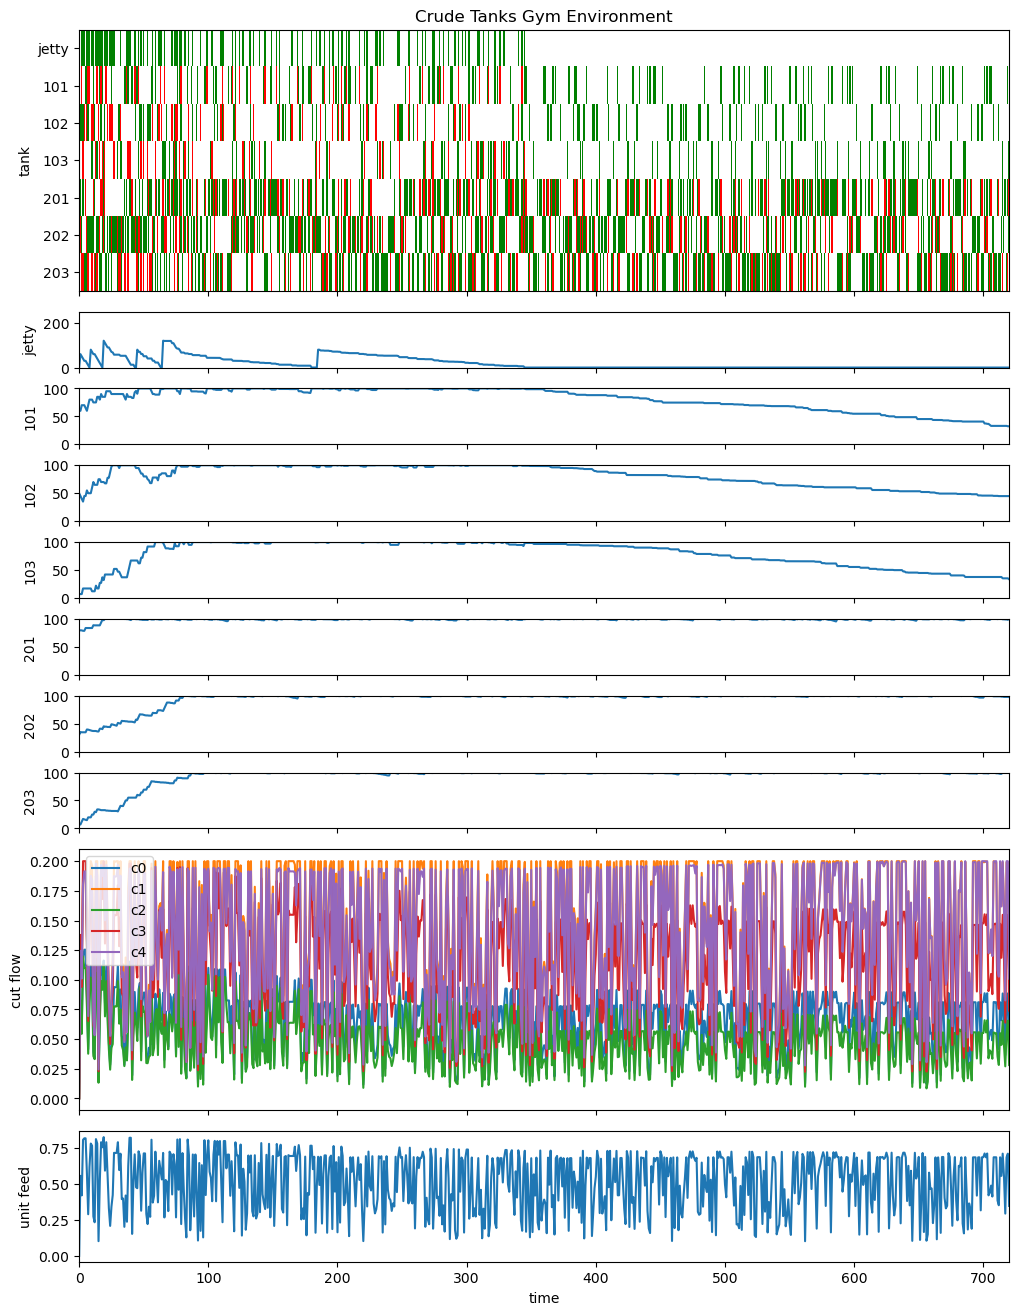

In [4]:
#env = gym.wrappers.FlattenObservation(env)
state0, data = env.reset(seed=200560)
actionAvail = data['actionAvail']
totalReward = 0
done = False
t = 0
while not done:
    action = env.action_space.sample()
    if actionAvail[0][action['farmTanks'][0]] and actionAvail[1][action['farmTanks'][1]]: 
        obs, reward, done, _, info = env.step(action)
        actionAvail = info['actionAvail']
        totalReward += reward
        t += 1
print(t, totalReward)
env.S.render()

In [6]:
data

{'sched': {134: vol:  60.00 comp: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.],
  391: vol:  80.00 comp: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.],
  408: vol: 120.00 comp: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.],
  458: vol:  80.00 comp: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.],
  583: vol: 120.00 comp: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.],
  600: vol:  80.00 comp: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]},
 'assay': array([[0.21358086, 0.173594  , 0.31163057, 0.08166729, 0.24667973,
         0.1418612 , 0.12560216, 0.08870941, 0.12500901, 0.06815395],
        [0.15616682, 0.28096619, 0.23883909, 0.38020203, 0.18437196,
         0.28976727, 0.20464936, 0.06142133, 0.2297371 , 0.38825948],
        [0.14577631, 0.33642511, 0.14044292, 0.02069796, 0.29279211,
         0.07952616, 0.13113541, 0.19994112, 0.08162393, 0.09022138],
        [0.21335763, 0.00191717, 0.14853604, 0.16791889, 0.19903276,
         0.26800256, 0.3166691 , 0.36648156, 0.36595005, 0.18855068],
        [0.27111838, 0.20709752, 0.16055138, 0.34951383, 0.07712342,
        